# Model Selection 

The objective of this notebook is to build a very first ent to end Machine Learning model to predict the probability of a patient being discharged on a particular day.

We'll use the dataset generated by the `dataset` job of the ETL folder. 

At this instance, the focus won't be on model performance but rather on understanding the value potential of the available data and the speedness of the solution.

In [1]:
%cd /Users/josefinadallavia/Documents/MIM/Tesis/AML-hospital

/Users/josefinadallavia/Documents/MIM/Tesis/AML-hospital


In [2]:
import warnings
warnings.filterwarnings('ignore')
import os
import pandas as pd
from matplotlib import pyplot as plt   
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from thesis_lib.utils import * 
from thesis_lib.modelling.data import *
from thesis_lib.modelling.model import *


/Users/josefinadallavia/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/josefinadallavia/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/josefinadallavia/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
data = Data().load('data/hospital_dataset')
variables = data.get_variables_dict()
data.get_stats()

Loading dataset:  hospital_train_data.parquet
Loading dataset:  hospital_val_data.parquet
Loading dataset:  hospital_test_data.parquet


dataset_type,train,val,test
n_observations,319150,33482,33309
relative_size,0.82694,0.0867542,0.0863059
n_cols,71,71,71
positives,42697,4555,4507
negatives,276453,28927,28802
positive_prop,0.133783,0.136043,0.135309
negative_prop,0.866217,0.863957,0.864691
min_date,2017-01-01,2018-11-11,2018-11-11
max_date,2018-11-10,2019-11-11,2019-11-11


In [4]:
text_features = ['administrative_diagnosis','presumptive_dianogsis','images_studies_names',
                'surgeries_actual']

In [1]:
text_features_extra  = ['labos_studies_names','sectors_names','images_study_types','surgeries_types',
                    'surgeries_injury_condition','surgeries_post_surgery_condition','surgeries_anesthesia_types',
 'administrative_diagnosis','presumptive_dianogsis','images_studies_names',
                'surgeries_actual']

In [2]:
len(text_features_extra)

11

In [6]:
categorical_features = ['date_weekday',
 'request_origin',
 'origin',
 'entity_group',
 'gender',
 'request_sector',
 'insurance_entity',
 'admission_sector',
 'emergency_service',
 'isolation',
 'ARM_TEP',
 'CEC_TEP',
 'request_sector',
 'date_weekday',
 'admission_weekday',
 'date_month',
 'admission_month']

In [7]:
numerical_features = ['PIM2TEP',
 'emergency_service',
 'high_risk_TEP',
 'hosp_day_number',
 'images_count',
 'images_cumulative',
 'images_emergencies',
 'images_requester_roles_count',
 'images_requesters_count',
 'images_study_types_count',
 'labos_count',
 'labos_cumulative',
 'labos_emergencies',
 'labos_requester_roles_count',
 'labos_requesters_count',
 'labos_set_count',
 'labos_set_cumulative',
 'low_risk_TEP',
 'new_born_gestation_age',
 'new_born_weight',
 'patient_age',
 'sectors_count',
 'sectors_last_stay',
 'surgeries_count',
 'surgeries_cumulative',
 'surgeries_post_surgery_duration',
 'surgeries_pre_surgery_duration',
 'surgeries_prep_duration',
 'surgeries_services_count',
 'surgeries_surgery_delay',
 'surgeries_surgery_duration',
 'surgeries_types_count']

### Text only

In [8]:
model_params = {'classifier': 'lgbm',
               'accepts_sparse': True,
                #'categorical_features' : categorical_features ,
                #'numerical_features' : numerical_features,
               'text_features': text_features,
               # 'sequence_features':sequence_features
               }

In [9]:
lgbm_text_features = Model(**model_params)
lgbm_text_features.transform(data)

Fitting pipeline...
	 Preprocessing data
	 Preprocessing data
	 Preprocessing data
	 Preprocessing data
Transforming data...
	 Transforming text features
	 Preprocessing data
	 Transforming text features with TF-IDF embeddings
	 Transforming text features
	 Preprocessing data
	 Transforming text features with TF-IDF embeddings
	 Transforming text features
	 Preprocessing data
	 Transforming text features with TF-IDF embeddings
	 Transforming text features
	 Preprocessing data
	 Transforming text features with TF-IDF embeddings
	 Transforming text features
	 Preprocessing data
	 Transforming text features with TF-IDF embeddings
	 Transforming text features
	 Preprocessing data
	 Transforming text features with TF-IDF embeddings
	 Transforming text features
	 Preprocessing data
	 Transforming text features with TF-IDF embeddings
	 Transforming text features
	 Preprocessing data
	 Transforming text features with TF-IDF embeddings


In [10]:
%%time
import time
start = time.time()
lgbm_text_features.fit_classifier()
end = time.time()

Training classifier


/Users/josefinadallavia/opt/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[10]	training_set's auc: 0.69392	validation_set's auc: 0.668447
[20]	training_set's auc: 0.709845	validation_set's auc: 0.683521
[30]	training_set's auc: 0.722275	validation_set's auc: 0.692521
[40]	training_set's auc: 0.731798	validation_set's auc: 0.701275
[50]	training_set's auc: 0.738056	validation_set's auc: 0.706732
[60]	training_set's auc: 0.743904	validation_set's auc: 0.711759
[70]	training_set's auc: 0.748541	validation_set's auc: 0.715209
[80]	training_set's auc: 0.752249	validation_set's auc: 0.717536
[90]	training_set's auc: 0.755839	validation_set's auc: 0.719407
[100]	training_set's auc: 0.758009	validation_set's auc: 0.720146
CPU times: user 33.9 s, sys: 565 ms, total: 34.5 s
Wall time: 28.7 s


In [11]:
n = lgbm_text_features.n_features

In [12]:
perf = lgbm_text_features.get_performance_metrics()

training AUC ROC score:  0.7579774956692591
validation AUC ROC score:  0.7201457076344606
relative over-fitting:  0.04991149242682298


In [13]:
# Write to the csv file ('a' means append)
import csv
out_file = 'experiments/output.csv'
of_connection = open(out_file, 'a')
writer = csv.writer(of_connection)
writer.writerow([4, 
                 'text_only', 
                 'gdbt', 
                 n,
                 end-start,
                 perf['auc_training'],
                 perf['auc_validation'],
                 perf['overfitting']
                ])
of_connection.close()

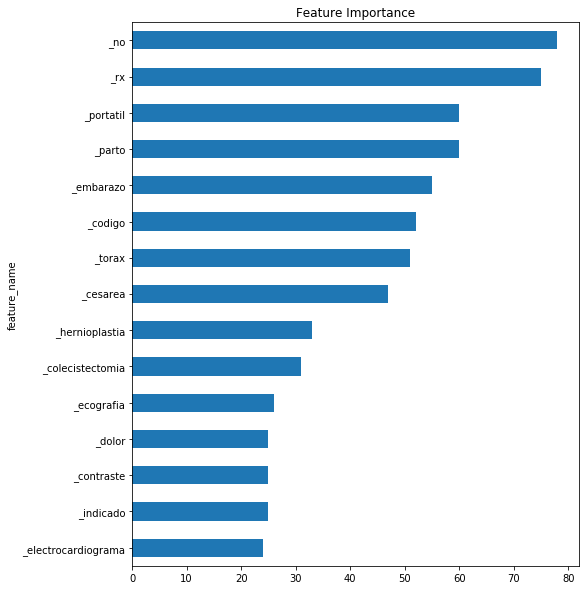

In [14]:
lgbm_text_features.plot_feature_importance(15)

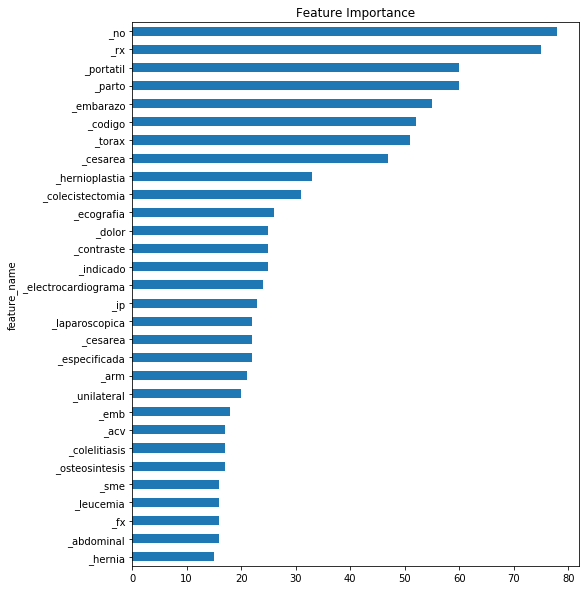

In [15]:
lgbm_text_features.plot_feature_importance()

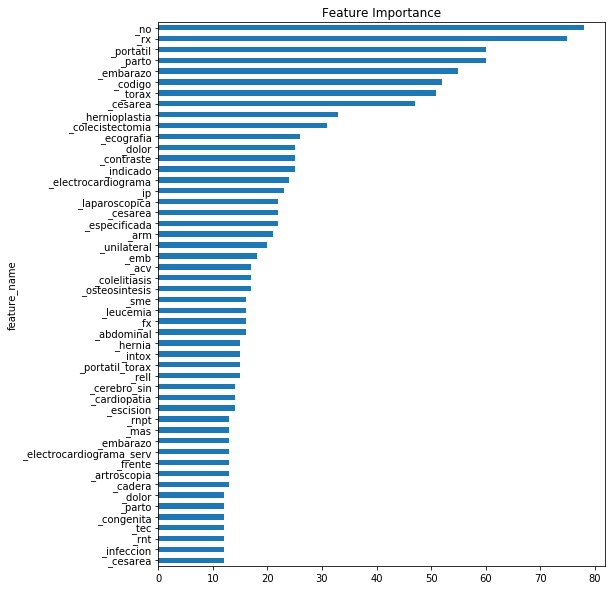

In [16]:
lgbm_text_features.plot_feature_importance(50)

### Sequence+ text 

In [17]:
model_params = {'classifier': 'lgbm',
               'accepts_sparse': True,
                #'categorical_features' : categorical_features ,
                #'numerical_features' : numerical_features,
               'text_features': text_features_extra,
                #'sequence_features':sequence_features
               }

In [18]:
lgbm_seq_features = Model(**model_params)
lgbm_seq_features.transform(data)


Fitting pipeline...
	 Preprocessing data
	 Preprocessing data
	 Preprocessing data
	 Preprocessing data
	 Preprocessing data
	 Preprocessing data
	 Preprocessing data
	 Preprocessing data
	 Preprocessing data
	 Preprocessing data
	 Preprocessing data
Transforming data...
	 Transforming text features
	 Preprocessing data
	 Transforming text features with TF-IDF embeddings
	 Transforming text features
	 Preprocessing data
	 Transforming text features with TF-IDF embeddings
	 Transforming text features
	 Preprocessing data
	 Transforming text features with TF-IDF embeddings
	 Transforming text features
	 Preprocessing data
	 Transforming text features with TF-IDF embeddings
	 Transforming text features
	 Preprocessing data
	 Transforming text features with TF-IDF embeddings
	 Transforming text features
	 Preprocessing data
	 Transforming text features with TF-IDF embeddings
	 Transforming text features
	 Preprocessing data
	 Transforming text features with TF-IDF embeddings
	 Transforming

In [19]:
%%time
start = time.time()
lgbm_seq_features.fit_classifier()
end = time.time()

Training classifier


/Users/josefinadallavia/opt/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[10]	training_set's auc: 0.750155	validation_set's auc: 0.736575
[20]	training_set's auc: 0.760113	validation_set's auc: 0.744342
[30]	training_set's auc: 0.77029	validation_set's auc: 0.751246
[40]	training_set's auc: 0.775834	validation_set's auc: 0.754106
[50]	training_set's auc: 0.781144	validation_set's auc: 0.757501
[60]	training_set's auc: 0.785312	validation_set's auc: 0.76139
[70]	training_set's auc: 0.789249	validation_set's auc: 0.764117
[80]	training_set's auc: 0.792505	validation_set's auc: 0.765078
[90]	training_set's auc: 0.795901	validation_set's auc: 0.766625
[100]	training_set's auc: 0.798476	validation_set's auc: 0.76781
CPU times: user 60 s, sys: 1.09 s, total: 1min 1s
Wall time: 45.5 s


In [20]:
perf = lgbm_seq_features.get_performance_metrics()

training AUC ROC score:  0.7984446022071656
validation AUC ROC score:  0.7678103482945089
relative over-fitting:  0.03836741312794086


In [21]:
n= lgbm_seq_features.n_features

In [22]:
# Write to the csv file ('a' means append)
import csv
out_file = 'experiments/output.csv'
of_connection = open(out_file, 'a')
writer = csv.writer(of_connection)
writer.writerow([4, 
                 'text+sequence_only', 
                 'gdbt', 
                 n,
                 end-start,
                 perf['auc_training'],
                 perf['auc_validation'],
                 perf['overfitting']
                ])
of_connection.close()

### Random forest + text

In [23]:
model_params = {'classifier': 'random_forest',
               'accepts_sparse': True,
                #'categorical_features' : categorical_features ,
                #'numerical_features' : numerical_features,
               'text_features': text_features_extra
                #,
                #'sequence_features':sequence_features
               }

In [24]:
rf_comb_text_features = Model(**model_params)
rf_comb_text_features.transform(data)


Fitting pipeline...
	 Preprocessing data
	 Preprocessing data
	 Preprocessing data
	 Preprocessing data
	 Preprocessing data
	 Preprocessing data
	 Preprocessing data
	 Preprocessing data
	 Preprocessing data
	 Preprocessing data
	 Preprocessing data
Transforming data...
	 Transforming text features
	 Preprocessing data
	 Transforming text features with TF-IDF embeddings
	 Transforming text features
	 Preprocessing data
	 Transforming text features with TF-IDF embeddings
	 Transforming text features
	 Preprocessing data
	 Transforming text features with TF-IDF embeddings
	 Transforming text features
	 Preprocessing data
	 Transforming text features with TF-IDF embeddings
	 Transforming text features
	 Preprocessing data
	 Transforming text features with TF-IDF embeddings
	 Transforming text features
	 Preprocessing data
	 Transforming text features with TF-IDF embeddings
	 Transforming text features
	 Preprocessing data
	 Transforming text features with TF-IDF embeddings
	 Transforming

In [25]:
%%time
start = time.time()
rf_comb_text_features.fit_classifier()
end = time.time()

Training classifier


/Users/josefinadallavia/opt/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[10]	training_set's auc: 0.719291	validation_set's auc: 0.70134
[20]	training_set's auc: 0.719497	validation_set's auc: 0.701652
[30]	training_set's auc: 0.721168	validation_set's auc: 0.703423
[40]	training_set's auc: 0.721814	validation_set's auc: 0.703561
[50]	training_set's auc: 0.724199	validation_set's auc: 0.706419
[60]	training_set's auc: 0.72416	validation_set's auc: 0.706297
[70]	training_set's auc: 0.724172	validation_set's auc: 0.706997
[80]	training_set's auc: 0.723911	validation_set's auc: 0.706959
[90]	training_set's auc: 0.723925	validation_set's auc: 0.706891
[100]	training_set's auc: 0.726638	validation_set's auc: 0.710153
CPU times: user 1min 8s, sys: 1.25 s, total: 1min 9s
Wall time: 52.9 s


In [26]:
perf = rf_comb_text_features.get_performance_metrics()

training AUC ROC score:  0.7266209591061618
validation AUC ROC score:  0.7101526204518684
relative over-fitting:  0.022664276949224682


In [27]:
n = rf_comb_text_features.n_features

In [28]:
# Write to the csv file ('a' means append)
import csv
out_file = 'experiments/output.csv'
of_connection = open(out_file, 'a')
writer = csv.writer(of_connection)
writer.writerow([4, 
                 'text+sequence_only', 
                 'rf', 
                 n,
                 end-start,
                 perf['auc_training'],
                 perf['auc_validation'],
                 perf['overfitting']
                ])
of_connection.close()

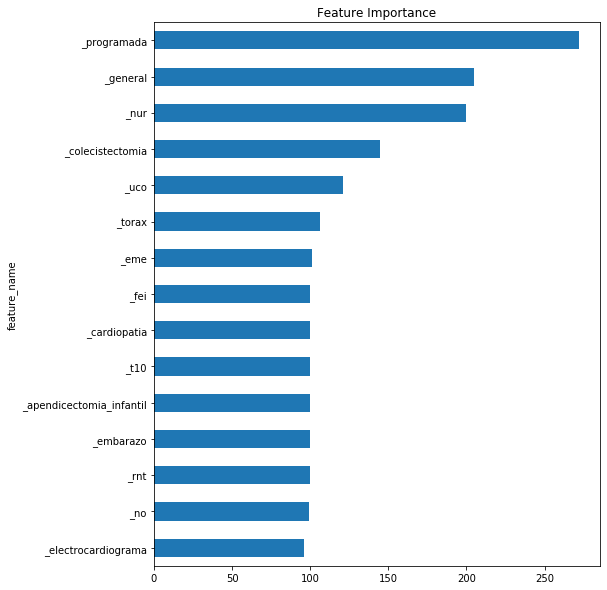

In [29]:
rf_comb_text_features.plot_feature_importance(15)

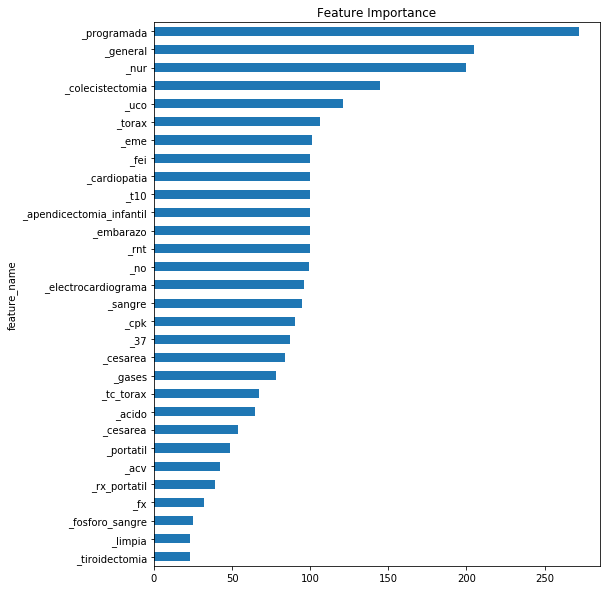

In [30]:
rf_comb_text_features.plot_feature_importance()

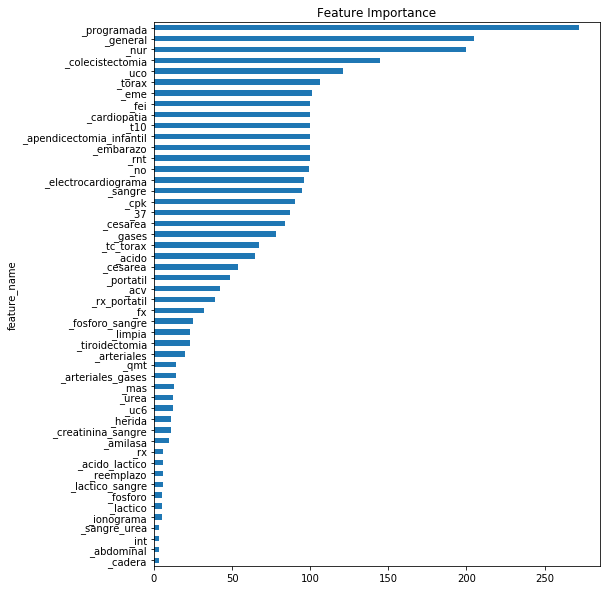

In [31]:
rf_comb_text_features.plot_feature_importance(50)